In [22]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd

In [23]:
engine = create_engine('sqlite:///shop.db') # подключаемся к БД

# Считываем данные
categories = pd.read_sql(
    "SELECT * FROM categories",
    con=engine,
    index_col='id'
)

products = pd.read_sql(
    "SELECT * FROM products",
    con=engine,
    index_col='id'
)

sells = pd.read_sql(
    "SELECT * FROM sells",
    con=engine,
    index_col='id'
)
sells['sell_date'] = pd.to_datetime(sells['sell_date'])

suppliers = pd.read_sql(
    "SELECT * FROM suppliers",
    con=engine,
    index_col='id'
)

sup_to_prod = pd.read_sql(
    "SELECT * FROM sup_to_prod",
    con=engine,
    index_col='id'
)

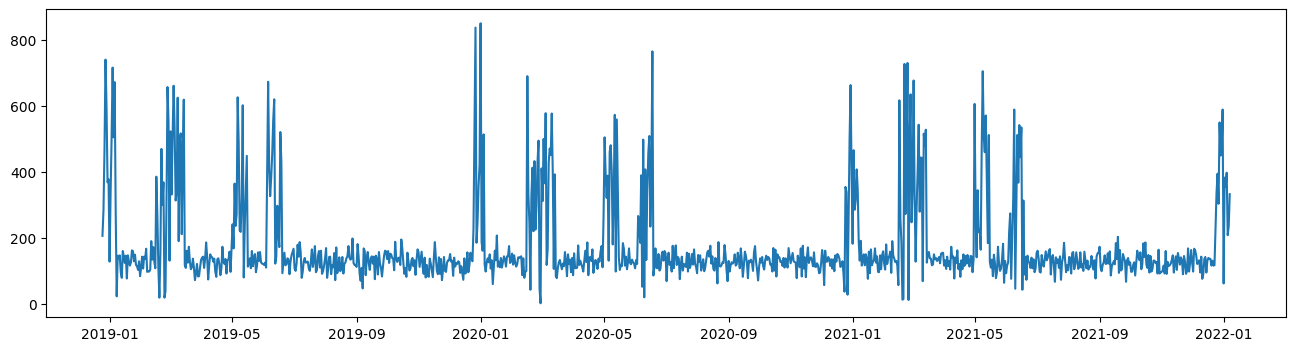

In [24]:
# АНАЛИЗ

import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
prod_id = 50
data = sells[sells.product_id==prod_id].sort_values('sell_date')
plt.plot(data.sell_date, data.quantity)
plt.show()

# Ярко выражены всплески в праздничные дни